In [139]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [3]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.loc[0][1:].shape

(784,)

In [5]:
train.loc[0][1:].values.reshape([28,28])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

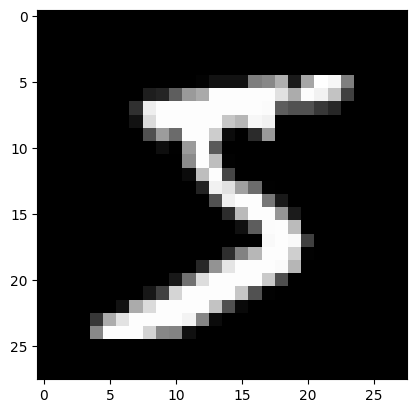

In [6]:
plt.imshow(train.loc[0][1:].values.reshape([28,28]), cmap='gray')

In [7]:
train_x = train.drop(columns='label')
train_y = train.label

test_x = test.drop(columns='label')
test_y = test.label

## kNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_x.values, train_y.values)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print(knn.predict([test_x.iloc[545]]))

[0]


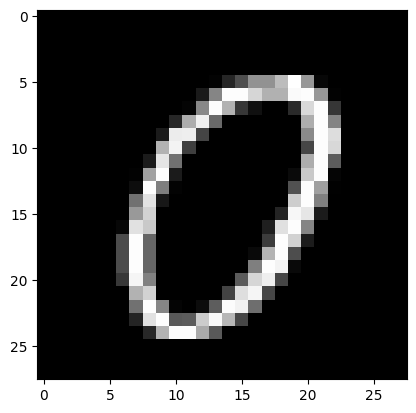

In [10]:
plt.imshow(test_x.iloc[545].values.reshape([28,28]), cmap='gray')

In [11]:
knn_results = knn.predict(test_x.values)

In [12]:
accuracy_score(knn_results, test_y)

0.9705

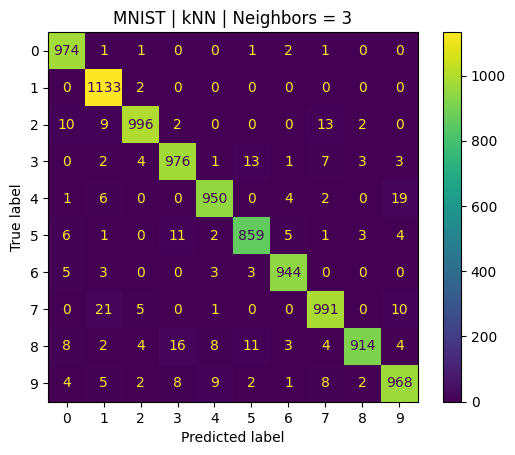

In [13]:
matrix = confusion_matrix(test_y, knn_results, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=knn.classes_)
disp.plot()
plt.title('MNIST | kNN | Neighbors = 3')
plt.show()

## SVM

In [30]:
svm = LinearSVC(verbose=1, C=0.0001, random_state=0)

svm.fit(train_x.values, train_y.values)

[LibLinear]

c:\Users\Tommy\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.0001, random_state=0, verbose=1)

In [31]:
print(svm.predict([test_x.iloc[545]]))

[0]


In [32]:
svm_results = svm.predict(test_x.values)

In [33]:
accuracy_score(svm_results, test_y)

0.9115

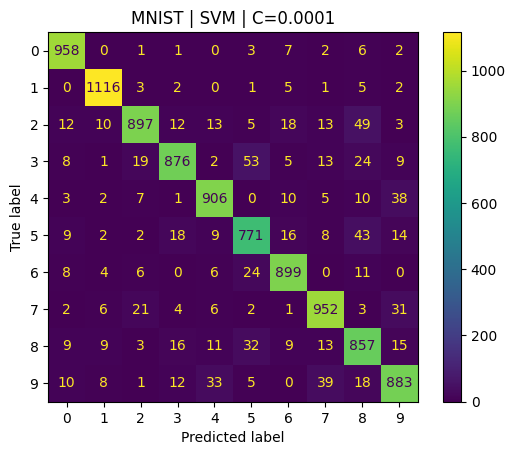

In [35]:
matrix = confusion_matrix(test_y, svm_results, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=svm.classes_)
disp.plot()
plt.title('MNIST | SVM | C=0.0001')
plt.show()

## Random Forest

In [127]:
rf = RandomForestClassifier(random_state=0, max_depth=30)

In [128]:
rf.fit(train_x.values, train_y.values)

RandomForestClassifier(max_depth=30, random_state=0)

In [129]:
print(rf.predict([test_x.iloc[545]]))

[0]


In [130]:
rf_results = rf.predict(test_x.values)

In [131]:
accuracy_score(rf_results, test_y)

0.97

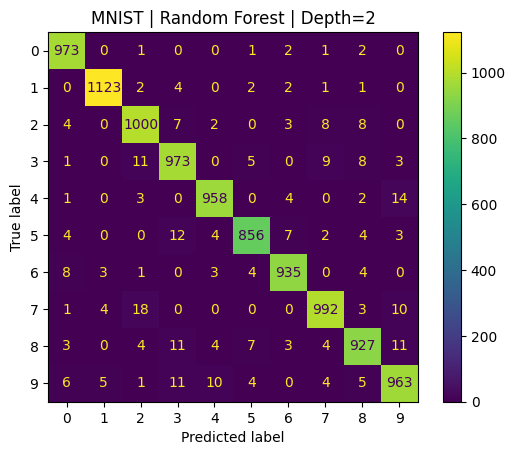

In [132]:
matrix = confusion_matrix(test_y, rf_results, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=rf.classes_)
disp.plot()
plt.title('MNIST | Random Forest | Depth=2')
plt.show()

## Ada Boost

In [159]:
ab = AdaBoostClassifier(learning_rate=0.5 ,n_estimators=200, random_state=0)

In [160]:
ab.fit(train_x.values, train_y.values)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=0)

In [161]:
print(ab.predict([test_x.iloc[545]]))

[5]


In [162]:
ab_results = ab.predict(test_x.values)

In [163]:
accuracy_score(ab_results, test_y)

0.7785

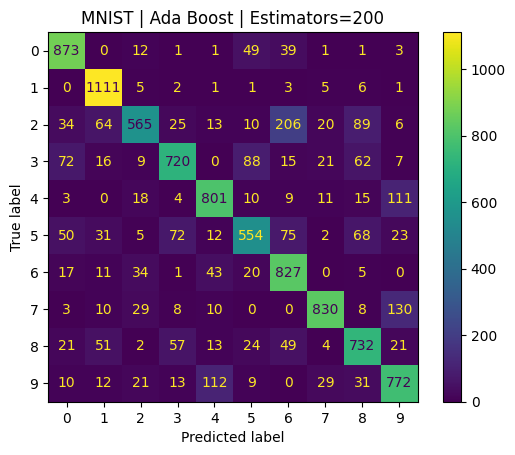

In [171]:
matrix = confusion_matrix(test_y, ab_results, labels=ab.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=ab.classes_)
disp.plot()
plt.title('MNIST | Ada Boost | Estimators=200')
plt.show()